In [3]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt


categ_table = pd.DataFrame(dict(names=['Peter', 'Jack', 'Eelin', 'John'],
                                vals1=[259, 83, 123, 162],
                                vals2=[159, 83, 23, 122],
                                vals3=[85, 48, 83, 67]))
categ_table = categ_table.set_index('names')
categ_table = categ_table.sort_values(by='vals1', ascending=False)

N = len(categ_table)
ndeep = 5
Width = 2
mydata = pd.DataFrame(columns=["x", "y", "type"])
j = 0
for i in range(0, categ_table.shape[0]):
    for j in range(0, categ_table.shape[1]):
        x = categ_table.iloc[i, j]
        a = np.arange(1, ndeep+1, 1)
        b = np.arange(1, np.ceil(x/ndeep)+1, 1)
        X, Y = np.meshgrid(a, b)
        df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})

        category = np.repeat(categ_table.columns[j], x)

        df_grid = df_grid.loc[np.arange(0, len(category)), :]
        df_grid['x'] = df_grid['x']+i*Width+(j+i*3)*ndeep

        df_grid['type'] = category
        mydata = mydata.append(df_grid)


mydata['type'] = pd.Categorical(mydata['type'], categories=categ_table.columns, ordered=True)
mydata['x'] = mydata['x'].astype(float)
x_breaks = (np.arange(0, N)*3+2)*ndeep+np.arange(0, N)*Width-ndeep/2
x_label = categ_table.index

#mydata_label=pd.DataFrame(dict(y=np.ceil(df_rowsum) / ndeep+2,x=x_breaks,label=df_rowsum))
breaks = np.arange(0, 65, 10)

mydata


,x,y,type
0,1.0,1.0,vals1
1,2.0,1.0,vals1
2,3.0,1.0,vals1
3,4.0,1.0,vals1
4,5.0,1.0,vals1
...,...,...,...
43,65.0,9.0,vals3
44,66.0,9.0,vals3
45,62.0,10.0,vals3
46,63.0,10.0,vals3


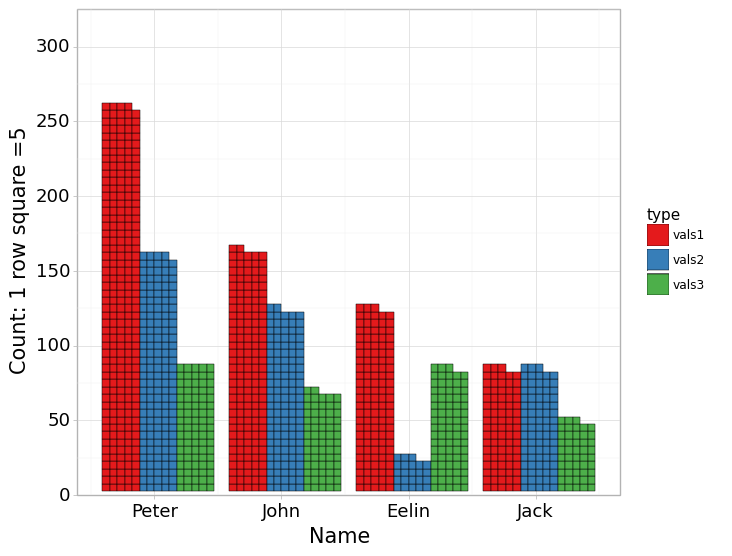

<ggplot: (142094121614)>


In [4]:
base_plot = (ggplot() +
             # The color of the lines between tiles
             geom_tile(aes(x='x', y='y', fill='type'), mydata, color="k", size=0.2) +
             # geom_text(aes(x='x',y='y',label='label'),data=mydata_label,size=13) + # The color of the lines between tiles
             scale_fill_brewer(type='qual', palette="Set1") +
             xlab("Name") +
             ylab("Count: 1 row square =" + str(ndeep)) +
             coord_fixed(ratio=1) +
             scale_x_continuous(breaks=x_breaks, labels=x_label) +
             scale_y_continuous(breaks=breaks, labels=breaks*ndeep, limits=(0, 65), expand=(0, 0)) +
             theme_light() +
             theme(  # panel.border = element_rect(fill=NA,size = 2),
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=13, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position='right',
    # aspect_ratio =1,
    figure_size=(7, 7),
    dpi=100
)
)
print(base_plot)
